# GWP Submission 3 Code file (Group-8)

In [1]:
#import required packages

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import multivariate_normal
from mpl_toolkits import mplot3d
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.varmax import VARMAX
import random
import numpy as np
import IPython.display
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,mean_squared_error

%matplotlib inline

# 1. Data Importing and Selection

In [2]:
#import data
data=pd.read_csv('./MScFE 650 MLF GWP Data.csv')
data.head()

,Date,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
0,1-Jan-16,1390.716,2376.29,3525.9150,1068.79,106.70,105.38,1036.23,1663.27,59.47,...,2373.17,811.96,404.73,1507.8101,1255.75,108.40,11136.65,1148.37,1818.40,1949.70
1,8-Jan-16,1291.267,2260.85,3280.6683,1005.56,97.66,99.35,952.01,1586.18,54.63,...,2209.38,751.09,388.05,1437.6600,1177.76,101.00,10389.93,1075.30,1722.00,1831.88
2,15-Jan-16,1257.086,2217.50,3118.2981,985.38,93.54,97.32,904.64,1541.08,51.54,...,2095.60,720.23,344.45,1372.9800,1133.72,97.34,10042.32,1056.01,1692.43,1789.56
3,22-Jan-16,1254.167,2281.98,2935.0677,985.87,95.79,100.73,879.17,1582.10,51.15,...,2173.55,745.96,367.44,1350.0500,1160.48,99.21,10469.07,1076.48,1719.61,1814.12
4,29-Jan-16,1298.240,2462.19,3134.0840,1005.56,96.93,103.05,958.97,1638.84,52.13,...,2214.88,825.18,400.93,1375.1000,1239.58,100.06,10432.42,1087.17,1774.40,1843.88


In [3]:
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)
data.head()

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,1390.716,2376.29,3525.9150,1068.79,106.70,105.38,1036.23,1663.27,59.47,8566.71,...,2373.17,811.96,404.73,1507.8101,1255.75,108.40,11136.65,1148.37,1818.40,1949.70
2016-01-08,1291.267,2260.85,3280.6683,1005.56,97.66,99.35,952.01,1586.18,54.63,8183.00,...,2209.38,751.09,388.05,1437.6600,1177.76,101.00,10389.93,1075.30,1722.00,1831.88
2016-01-15,1257.086,2217.50,3118.2981,985.38,93.54,97.32,904.64,1541.08,51.54,7755.73,...,2095.60,720.23,344.45,1372.9800,1133.72,97.34,10042.32,1056.01,1692.43,1789.56
2016-01-22,1254.167,2281.98,2935.0677,985.87,95.79,100.73,879.17,1582.10,51.15,8035.69,...,2173.55,745.96,367.44,1350.0500,1160.48,99.21,10469.07,1076.48,1719.61,1814.12
2016-01-29,1298.240,2462.19,3134.0840,1005.56,96.93,103.05,958.97,1638.84,52.13,8211.17,...,2214.88,825.18,400.93,1375.1000,1239.58,100.06,10432.42,1087.17,1774.40,1843.88


In [4]:
#Choice of response variable (LUXXX)
y=data['LUXXX']
y

Date
2016-01-01    1390.716
2016-01-08    1291.267
2016-01-15    1257.086
2016-01-22    1254.167
2016-01-29    1298.240
                ...   
2020-09-25     988.345
2020-10-02    1037.211
2020-10-09    1075.670
2020-10-16    1068.089
2020-10-23    1090.573
Name: LUXXX, Length: 252, dtype: float64

# 2. Measurng Skewness

In [5]:
#weekly return data
return_data=data.pct_change(1).dropna()
return_data

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-08,-0.071509,-0.048580,-0.069555,-0.059160,-0.084724,-0.057221,-0.081275,-0.046348,-0.081386,-0.044791,...,-0.069017,-0.074967,-0.041213,-0.046524,-0.062106,-0.068266,-0.067051,-0.063629,-0.053014,-0.060430
2016-01-15,-0.026471,-0.019174,-0.049493,-0.020068,-0.042187,-0.020433,-0.049758,-0.028433,-0.056562,-0.052214,...,-0.051499,-0.041087,-0.112357,-0.044990,-0.037393,-0.036238,-0.033456,-0.017939,-0.017172,-0.023102
2016-01-22,-0.002322,0.029078,-0.058760,0.000497,0.024054,0.035039,-0.028155,0.026618,-0.007567,0.036097,...,0.037197,0.035725,0.066744,-0.016701,0.023604,0.019211,0.042495,0.019384,0.016060,0.013724
2016-01-29,0.035141,0.078971,0.067806,0.019972,0.011901,0.023032,0.090767,0.035864,0.019159,0.021838,...,0.019015,0.106199,0.091144,0.018555,0.068161,0.008568,-0.003501,0.009931,0.031862,0.016405
2016-02-05,-0.018185,0.006791,0.030761,-0.004614,-0.025998,-0.066181,0.024631,-0.007426,-0.023979,-0.075624,...,0.004352,0.009865,-0.032250,0.002771,-0.002243,-0.034679,-0.016570,-0.041438,-0.038052,-0.032079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,-0.060663,-0.038719,-0.029566,0.021311,-0.053482,-0.057185,-0.064895,-0.005072,-0.037575,-0.005850,...,-0.035754,-0.038059,-0.053961,-0.010630,-0.024578,-0.041188,-0.026886,-0.027232,-0.028324,-0.005252
2020-10-02,0.049442,0.038383,0.005972,-0.033009,-0.000706,0.021198,-0.041740,0.006509,0.025536,0.024026,...,0.006563,0.008420,-0.020648,0.011964,0.030356,0.019375,0.018148,0.004926,0.010131,0.016352
2020-10-09,0.037079,0.073776,-0.022677,0.052142,0.060313,0.050758,0.060642,0.022035,0.039510,0.034281,...,0.018467,0.034006,0.018855,0.011116,0.011926,0.030887,0.017269,0.005202,0.017743,0.039061


In [6]:
#skewness of each return series
return_data.skew()

LUXXX                    -0.377199
MSCI ARGENTINA           -1.558165
BLP ORIENTE MEDIO        -0.383367
MSCI AUSTRALIA           -1.591912
MSCI AUSTRIA             -0.865684
MSCI BELGIUM             -1.695599
MSCI BRAZIL               0.142589
MSCI CANADA              -2.363478
MSCI CHINA               -0.402967
MSCI DENMARK             -1.373932
MSCI EM ASIA             -0.606767
MSCI EM EU-MIDE-AFRICA   -0.954112
MSCI EM EUROPE           -1.601282
MSCI EM LATIN AMERICA    -0.516197
MSCI FINLAND             -1.711737
MSCI FRANCE              -1.648456
MSCI GERMANY             -1.506593
MSCI HONG KONG           -0.274383
MSCI INDIA               -0.277847
MSCI ITALY               -1.755134
MSCI JAPAN               -0.454980
MSCI KOREA               -0.732136
MSCI MEXICO              -0.779074
MSCI NETHERLANDS         -1.688612
MSCI NEW ZEALAND         -0.774727
MSCI NORWAY              -1.358375
MSCI PERU                -0.301576
MSCI RUSSIA              -1.130974
MSCI SINGAPORE      

In [7]:
#mean median difference of return series
return_data.mean()-return_data.median()

LUXXX                    -0.000680
MSCI ARGENTINA           -0.000893
BLP ORIENTE MEDIO        -0.000895
MSCI AUSTRALIA           -0.001517
MSCI AUSTRIA             -0.000061
MSCI BELGIUM             -0.002068
MSCI BRAZIL              -0.001548
MSCI CANADA              -0.001800
MSCI CHINA               -0.001661
MSCI DENMARK             -0.003404
MSCI EM ASIA             -0.001029
MSCI EM EU-MIDE-AFRICA   -0.001030
MSCI EM EUROPE           -0.001583
MSCI EM LATIN AMERICA    -0.002037
MSCI FINLAND             -0.000445
MSCI FRANCE              -0.002185
MSCI GERMANY             -0.002082
MSCI HONG KONG           -0.002758
MSCI INDIA               -0.002666
MSCI ITALY               -0.000929
MSCI JAPAN               -0.001769
MSCI KOREA               -0.000684
MSCI MEXICO               0.001356
MSCI NETHERLANDS         -0.001845
MSCI NEW ZEALAND         -0.001195
MSCI NORWAY              -0.001443
MSCI PERU                -0.001504
MSCI RUSSIA              -0.004467
MSCI SINGAPORE      

In [8]:
#Comparison of above two metrics
sk_metric_comparison=pd.concat([(return_data.mean()-return_data.median()),return_data.skew()],axis=1)
sk_metric_comparison.columns=['mean-median','skewness']
sk_metric_comparison

,mean-median,skewness
LUXXX,-0.000680,-0.377199
MSCI ARGENTINA,-0.000893,-1.558165
BLP ORIENTE MEDIO,-0.000895,-0.383367
MSCI AUSTRALIA,-0.001517,-1.591912
MSCI AUSTRIA,-0.000061,-0.865684
MSCI BELGIUM,-0.002068,-1.695599
MSCI BRAZIL,-0.001548,0.142589
MSCI CANADA,-0.001800,-2.363478
MSCI CHINA,-0.001661,-0.402967
MSCI DENMARK,-0.003404,-1.373932


Skewness:- refers to distortion/asymmetry which deviates from our standard normal curve or bell curve.(Source:- https://www.investopedia.com/terms/s/skewness.asp) 

Comparison of skewness and mean-median difference:
- Positively skewed data has mean>median>mode, implying that positive valuye of skewness corresponds to positive value of difference between mean and median.
- Negatively skewed data has mean<median<mode, implying that negative value of skewness corresponds to negative value of difference between mean and median.

Exceptions to above observation are:
- MSCI BRAZIL
- MSCI MEXICO
- MSCI SOUTH AFRICA

Above exceptions are due to impact of outliers in both positive and negative directions and the values in the opposite direction of skewness are more extreme than those in the same direction of skewness.

# 3. Structural Breaks and Kurtosis

In [9]:
# 3.1 kurtosis of our response return series 'LUXXX'
return_data['LUXXX'].kurt()

3.673164014051421

Our response variable 'LUXXX' return series  is Leptokurtic(Source- https://www.investopedia.com/terms/k/kurtosis.asp), that is, it has fatter tails as compared to a normal distribution. 

In [10]:
#for all variables
return_data.kurt()

LUXXX                      3.673164
MSCI ARGENTINA             9.979312
BLP ORIENTE MEDIO          8.558636
MSCI AUSTRALIA             8.386086
MSCI AUSTRIA               8.300975
MSCI BELGIUM              11.210002
MSCI BRAZIL                4.955046
MSCI CANADA               17.126114
MSCI CHINA                 0.503073
MSCI DENMARK               5.419496
MSCI EM ASIA               1.805496
MSCI EM EU-MIDE-AFRICA     6.216364
MSCI EM EUROPE             9.410206
MSCI EM LATIN AMERICA      5.863212
MSCI FINLAND              12.089493
MSCI FRANCE               12.775617
MSCI GERMANY              11.999360
MSCI HONG KONG             2.211644
MSCI INDIA                 6.868704
MSCI ITALY                12.741930
MSCI JAPAN                 5.752759
MSCI KOREA                 4.672002
MSCI MEXICO                3.925753
MSCI NETHERLANDS          10.327415
MSCI NEW ZEALAND           5.590298
MSCI NORWAY                8.107998
MSCI PERU                  5.007732
MSCI RUSSIA                5

In [11]:
#Threshold regression to id regime shifts (no of regimes = 2)
markov_ar = sm.tsa.MarkovRegression(
    data["LUXXX"], k_regimes=2
)
result = markov_ar.fit()
print(result.summary())

c:\users\harshil sumra\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


                        Markov Switching Model Results                        
Dep. Variable:                  LUXXX   No. Observations:                  252
Model:               MarkovRegression   Log Likelihood               -1629.403
Date:                Tue, 19 Jul 2022   AIC                           3268.806
Time:                        18:39:49   BIC                           3286.454
Sample:                    01-01-2016   HQIC                          3275.907
                         - 10-23-2020                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        998.6616     27.422     36.418      0.000     944.916    1052.408
                             Regime 1 parameters    

In [12]:
result.expected_durations

array([112.0014886 , 290.01106011])

In [13]:
result.regime_transition

array([[[0.99107155],
        [0.00344814]],

       [[0.00892845],
        [0.99655186]]])

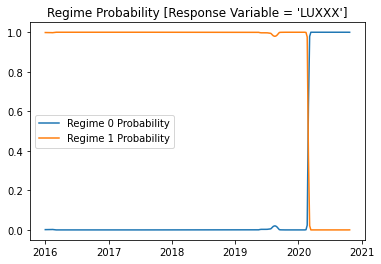

In [14]:
#probablity plot for regimes
plt.plot(result.smoothed_marginal_probabilities[0], label="Regime 0 Probability")
plt.plot(result.smoothed_marginal_probabilities[1], label="Regime 1 Probability")
plt.title("Regime Probability [Response Variable = 'LUXXX']")
plt.legend();

In [15]:
#regime-wise standard deviation of 'LUXXX'
expected_regime =  (result.smoothed_marginal_probabilities[1] > result.smoothed_marginal_probabilities[0]).astype(int)
expected_regime = expected_regime[1:]
expected_regime.name = "regime"
ret = return_data["LUXXX"]
ret.name = "ret"
ret_data = pd.DataFrame([expected_regime, ret]).T

print("regime std")
print(ret_data.groupby(['regime'])['ret'].std())

regime std
regime
0.0    0.055273
1.0    0.028661
Name: ret, dtype: float64


In [16]:
#Fit Bivariate normal distribution
joined_data = pd.DataFrame([data["LUXXX"], data["MSCI INDIA"]]).T

joined_data.cov()
joined_data.mean()
var = multivariate_normal(mean=joined_data.mean(), cov=joined_data.cov())

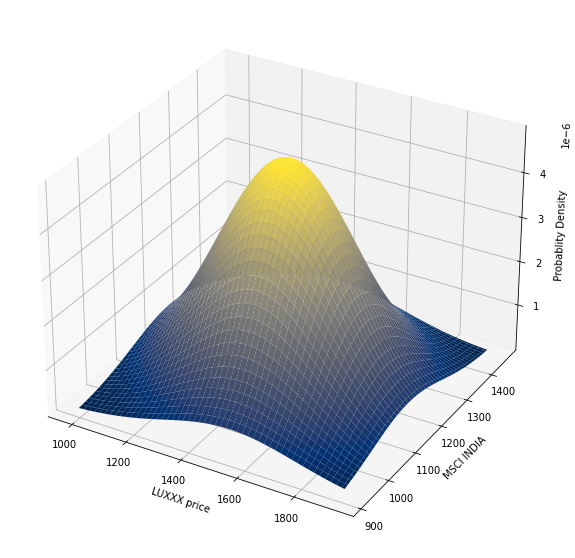

In [17]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

mean_0 = joined_data.mean()["LUXXX"]
std_0 = np.sqrt(joined_data.cov()["LUXXX"]["LUXXX"])
mean_1 = joined_data.mean()["MSCI INDIA"]
std_1 = np.sqrt(joined_data.cov()["MSCI INDIA"]["MSCI INDIA"])


x = np.linspace(mean_0-2*std_0, mean_0+2*std_0, 100)
y = np.linspace(mean_1-2*std_1, mean_1+2*std_1, 100)

X, Y = np.meshgrid(x, y)
Z = []
for x_cur in x:
    for y_cur in y:
        cur_var = var.pdf([x_cur, y_cur])
        Z.append(cur_var)

Z = np.array(Z)
Z.resize(len(x), len(y))
Z
surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)
ax.set_xlabel('LUXXX price')
ax.set_ylabel('MSCI INDIA')
ax.set_zlabel('Probablity Density');

# 4. Visualizing Distribution

c:\users\harshil sumra\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\harshil sumra\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


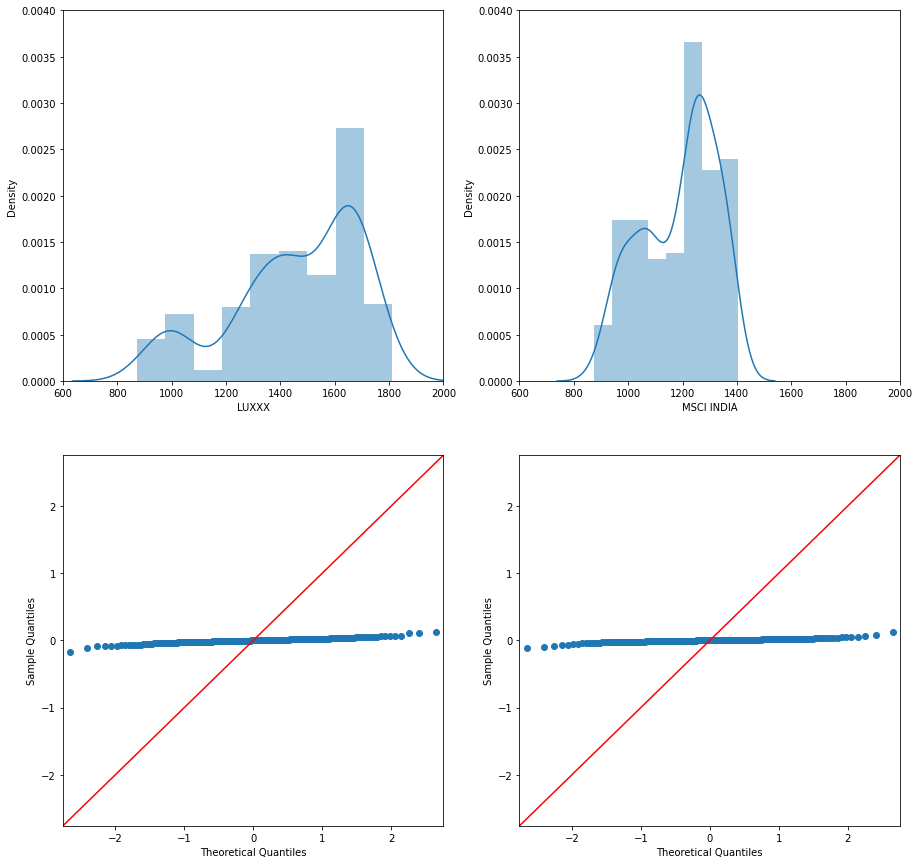

In [18]:
fig=plt.figure(figsize=(15,15))
ax_1=plt.subplot(221)
sns.distplot(a=data['LUXXX'],ax=ax_1)
ax_1.set_xlim(left=600,right=2000)
ax_1.set_ylim(top=0.0040)
ax_2=plt.subplot(222)
sns.distplot(a=data['MSCI INDIA'],ax=ax_2)
ax_2.set_xlim(left=600,right=2000)
ax_2.set_ylim(top=0.0040)
ax_3=plt.subplot(223)
sm.qqplot(return_data["LUXXX"], line ='45', ax=ax_3)
ax_4=plt.subplot(224)
sm.qqplot(return_data["MSCI INDIA"], line ='45', ax=ax_4);

# 5. Outliers

c:\users\harshil sumra\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\harshil sumra\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


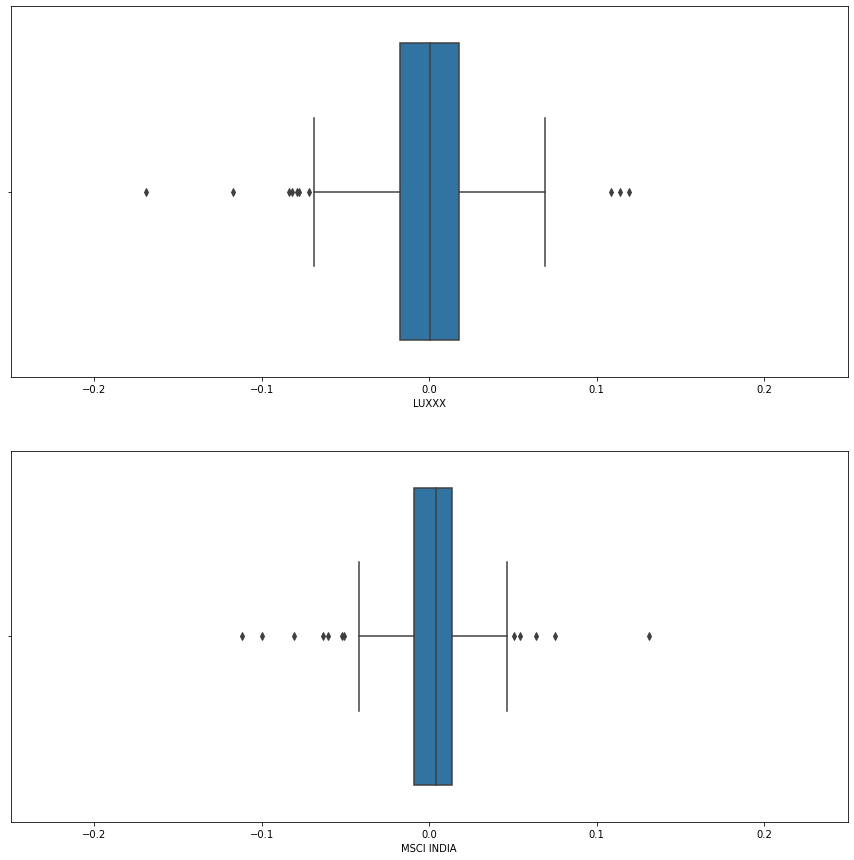

In [19]:
#Id the outliers using boxplots
fig=plt.figure(figsize=(15,15))
ax_1=plt.subplot(211)
sns.boxplot(return_data['LUXXX'],ax=ax_1)
ax_1.set_xlabel('LUXXX')
ax_1.set_xlim(left=-0.25,right=0.25)
ax_2=plt.subplot(212)
sns.boxplot(return_data['MSCI INDIA'],ax=ax_2)
ax_2.set_xlim(left=-0.25,right=0.25)
ax_2.set_xlabel('MSCI INDIA');


In [20]:
pertinent_data=return_data[['LUXXX','MSCI INDIA']]

In [21]:
data_std = pertinent_data.std()
data_mean = pertinent_data.mean()
outliers = pertinent_data[pertinent_data > data_mean + 2*data_std].append(pertinent_data[pertinent_data < data_mean - 2*data_std])
outliers.dropna()

,LUXXX,MSCI INDIA
Date,,
2016-03-04,0.108592,0.054143
2020-06-05,0.119292,0.050901
2016-02-12,-0.068617,-0.063632
2020-02-28,-0.117117,-0.080676
2020-03-13,-0.169119,-0.100159
2020-03-20,-0.082232,-0.111608


## What is Monotone Transformation? 

Monotone Transformation is a process of transforming data while preserving the order/ranking of the input data. Generally, incase of outlier related application, we utilize thes methods/functions so as to make our distribution more closer to normal distribution which would make it easier to analyse the data with the most basic normal assumptions.

In [22]:
#monotone transformation function
def m_transform_op(var_name):
    abs_min_ret = -min(return_data[var_name])
    transformed_data = np.square((return_data[var_name] + abs_min_ret)) - np.square(abs_min_ret)
    abs_min_ret = -min(transformed_data)
    transformed_data = np.sqrt(transformed_data +abs_min_ret + 1) - np.sqrt(abs_min_ret + 1)
    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    sns.boxplot(transformed_data)
    plt.subplot(1,2,2)
    sns.distplot(transformed_data)
    plt.tight_layout();


c:\users\harshil sumra\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\harshil sumra\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


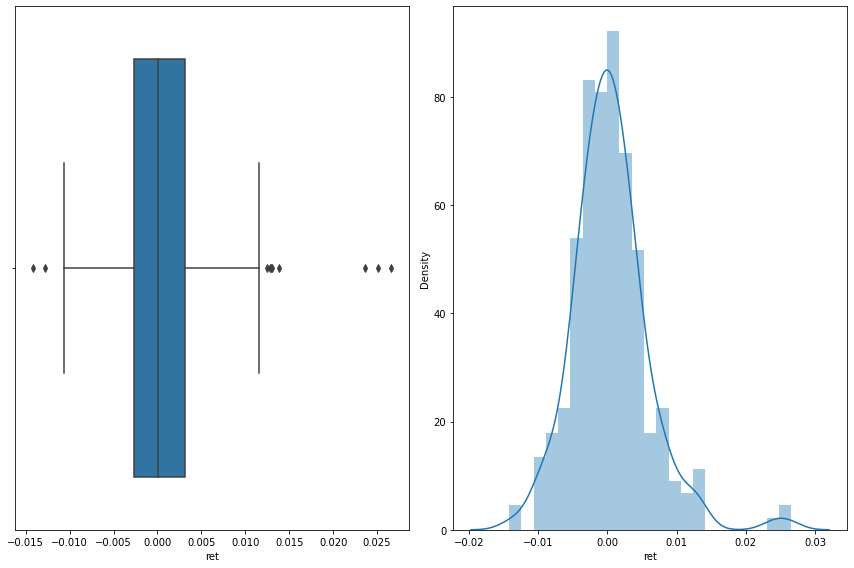

In [23]:
m_transform_op('LUXXX')

c:\users\harshil sumra\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\harshil sumra\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


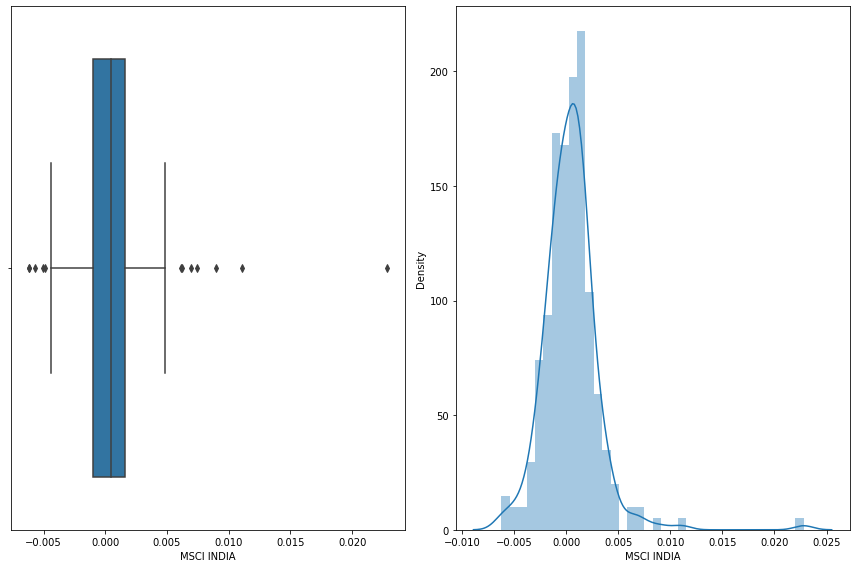

In [24]:
m_transform_op('MSCI INDIA')

We can observe that both the series ('LUXXX' and 'MSCI INDIA') have become much closer to normal distribution post transformation.

## Q.6. Is the neural network methodology supervised or unsupervised?  Explain.

Neural networks are a type of supervised learning algorithm as the process of feeding forward based on initial weights, Cost function calculation and back-propagating to calculate gradient which are then used for gradient descent algorithm aiming to minimize the cost function essentially need both dependent/target/endogenous feature and independent/exogenous feature. This is the defining characteristic of supervised learning algorithm.    

# 7. VARMA Model

7.1 Run an VARMA model, which models your response (e.g. LUXXX) versus lagged versions of itself AND with some number of exogeneous variables (e.g. the other ETFs). Use the variables you chose from your LASSO regression (see GWP#1).

In GWP 1, we found that the most important feature is 'MSCI ITALY'., which we will show again below and verify.

In [25]:
#Lasso verification
y = pd.DataFrame(data.iloc[:, 0])
x = pd.concat([pd.DataFrame(data.iloc[:, 1]), data.iloc[:, 2:]], axis=1)

In [26]:
model = Lasso(alpha=0.1)
model.fit(x, y)

feature_importance=pd.DataFrame(model.coef_,index=x.columns).apply(abs).sort_values(by=0,ascending=False)
feature_importance.columns=['coefficient']
feature_importance

c:\users\harshil sumra\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.425e+05, tolerance: 1.429e+03
  model = cd_fast.enet_coordinate_descent(


,coefficient
MSCI ITALY,14.388783
MSCI SPAIN,8.562344
MSCI GERMANY,6.514271
MSCI NETHERLANDS,6.057373
MSCI BELGIUM,2.615699
MSCI FRANCE,1.860196
MSCI AUSTRIA,1.610859
MSCI EM ASIA,1.515386
MSCI EM EUROPE,1.387374
MSCI EM EU-MIDE-AFRICA,1.290589


In [27]:
top_predictor=data['MSCI ITALY']
top_predictor

Date
2016-01-01    61.26
2016-01-08    56.94
2016-01-15    54.86
2016-01-22    54.36
2016-01-29    53.16
              ...  
2020-09-25    48.90
2020-10-02    49.52
2020-10-09    50.76
2020-10-16    50.23
2020-10-23    50.06
Name: MSCI ITALY, Length: 252, dtype: float64

In [28]:
y=data['LUXXX']
y

Date
2016-01-01    1390.716
2016-01-08    1291.267
2016-01-15    1257.086
2016-01-22    1254.167
2016-01-29    1298.240
                ...   
2020-09-25     988.345
2020-10-02    1037.211
2020-10-09    1075.670
2020-10-16    1068.089
2020-10-23    1090.573
Name: LUXXX, Length: 252, dtype: float64

In [29]:
#data prepration
def get_data(top_predictor, y):
    x_varma = pd.concat([top_predictor, y], axis=1)
    #get rid of last element
    x_varma = x_varma.iloc[:-1, :]
    # get rid of first element so we preict the future results
    y_varma = pd.concat([y.iloc[1:], top_predictor.iloc[1:]], axis=1)
    y_varma.index = range(0,len(y_varma))

    # compute pct change for stationarity
    x_varma_pct = x_varma.pct_change()[1:]
    y_varma_pct = y_varma.pct_change()[1:]
    return x_varma_pct, y_varma_pct

x_varma_pct, y_varma_pct = get_data(top_predictor, y)

In [30]:
x_varma_pct=x_varma_pct.reset_index(drop=True)
y_varma_pct=y_varma_pct.reset_index(drop=True)

In [31]:
#modeling VARMAX model
varmax_model = sm.tsa.VARMAX(endog=y_varma_pct, exog=x_varma_pct, order=(2, 0, 2))
res = varmax_model.fit(maxiter=1000, disp=False)

In [32]:
model_log_likelihood = res.llf
model_log_likelihood

1078.3203290805588

In [33]:
print (res.summary())

                              Statespace Model Results                             
Dep. Variable:     ['LUXXX', 'MSCI ITALY']   No. Observations:                  250
Model:                             VARX(2)   Log Likelihood                1078.320
                               + intercept   AIC                          -2122.641
Date:                     Tue, 19 Jul 2022   BIC                          -2062.776
Time:                             18:41:30   HQIC                         -2098.547
Sample:                                  0                                         
                                     - 250                                         
Covariance Type:                       opg                                         
Ljung-Box (L1) (Q):             0.08, 0.00   Jarque-Bera (JB):        94.22, 118.57
Prob(Q):                        0.77, 0.97   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         2.76, 1.11   Skew:                     -0.25

Q. 7.2. What is the difference between how we ran LASSO (GWP #1) and the VARMA?  (Hint: think about time subscripts)


    The crux of the difference is the fact that VARMA model allows us to also consider lagged values of independent variable whereas the Lasso only considers current values for modeling purpose. 

In [34]:
#7.3 
iteration = 0
for i in feature_importance.index:
    x_varma_pct, y_varma_pct = get_data(data[i], y)
    varmax_model = sm.tsa.VARMAX(endog=y_varma_pct.reset_index(drop=True), exog=x_varma_pct.reset_index(drop=True),
                                 order=(2, 0, 2))
    res = varmax_model.fit(maxiter=1000, disp=False)
    print("iteration %d" % iteration)
    print('exogenous variable = {}'.format(i))
    if res.llf < model_log_likelihood:
        break
    iteration = iteration +1

iteration 0
exogenous variable = MSCI ITALY
iteration 1
exogenous variable = MSCI SPAIN
iteration 2
exogenous variable = MSCI GERMANY
iteration 3
exogenous variable = MSCI NETHERLANDS
iteration 4
exogenous variable = MSCI BELGIUM
iteration 5
exogenous variable = MSCI FRANCE


c:\users\harshil sumra\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


iteration 6
exogenous variable = MSCI AUSTRIA
iteration 7
exogenous variable = MSCI EM ASIA
iteration 8
exogenous variable = MSCI EM EUROPE


In [35]:
print(res.summary())

                                Statespace Model Results                               
Dep. Variable:     ['LUXXX', 'MSCI EM EUROPE']   No. Observations:                  250
Model:                                 VARX(2)   Log Likelihood                1067.193
                                   + intercept   AIC                          -2100.386
Date:                         Tue, 19 Jul 2022   BIC                          -2040.522
Time:                                 18:47:37   HQIC                         -2076.293
Sample:                                      0                                         
                                         - 250                                         
Covariance Type:                           opg                                         
Ljung-Box (L1) (Q):             0.05, 0.00   Jarque-Bera (JB):        107.01, 67.15
Prob(Q):                        0.82, 0.95   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         2.77, 1.

# 8. Neural networks

# 8.1

In [36]:
#Data prepration and management
LUXXX_ret_data=return_data['LUXXX'].to_frame()
LUXXX_ret_data['lag_1']=LUXXX_ret_data.shift(1)
LUXXX_ret_data.dropna(inplace=True)
LUXXX_ret_data['LUXXX_cls_var']=np.where(LUXXX_ret_data['ret']>LUXXX_ret_data['lag_1'],1,0)
LUXXX_ret_data

,ret,lag_1,LUXXX_cls_var
Date,,,
2016-01-15,-0.026471,-0.071509,1
2016-01-22,-0.002322,-0.026471,1
2016-01-29,0.035141,-0.002322,1
2016-02-05,-0.018185,0.035141,0
2016-02-12,-0.068617,-0.018185,0
...,...,...,...
2020-09-25,-0.060663,0.035370,0
2020-10-02,0.049442,-0.060663,1
2020-10-09,0.037079,0.049442,0


In [37]:
data_clsnn=pd.concat([LUXXX_ret_data['LUXXX_cls_var'],return_data.drop(columns='LUXXX').iloc[1:]],axis=1)
data_clsnn.reset_index(drop=True,inplace=True)
data_clsnn

,LUXXX_cls_var,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
0,1,-0.019174,-0.049493,-0.020068,-0.042187,-0.020433,-0.049758,-0.028433,-0.056562,-0.052214,...,-0.051499,-0.041087,-0.112357,-0.044990,-0.037393,-0.036238,-0.033456,-0.017939,-0.017172,-0.023102
1,1,0.029078,-0.058760,0.000497,0.024054,0.035039,-0.028155,0.026618,-0.007567,0.036097,...,0.037197,0.035725,0.066744,-0.016701,0.023604,0.019211,0.042495,0.019384,0.016060,0.013724
2,1,0.078971,0.067806,0.019972,0.011901,0.023032,0.090767,0.035864,0.019159,0.021838,...,0.019015,0.106199,0.091144,0.018555,0.068161,0.008568,-0.003501,0.009931,0.031862,0.016405
3,0,0.006791,0.030761,-0.004614,-0.025998,-0.066181,0.024631,-0.007426,-0.023979,-0.075624,...,0.004352,0.009865,-0.032250,0.002771,-0.002243,-0.034679,-0.016570,-0.041438,-0.038052,-0.032079
4,0,-0.033136,-0.032112,-0.043730,-0.030717,-0.034812,-0.032587,-0.030596,-0.053459,-0.041629,...,-0.078759,0.073705,-0.055258,-0.031648,-0.026391,-0.068019,-0.034909,-0.038566,-0.023798,-0.009083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,-0.038719,-0.029566,0.021311,-0.053482,-0.057185,-0.064895,-0.005072,-0.037575,-0.005850,...,-0.035754,-0.038059,-0.053961,-0.010630,-0.024578,-0.041188,-0.026886,-0.027232,-0.028324,-0.005252
246,1,0.038383,0.005972,-0.033009,-0.000706,0.021198,-0.041740,0.006509,0.025536,0.024026,...,0.006563,0.008420,-0.020648,0.011964,0.030356,0.019375,0.018148,0.004926,0.010131,0.016352
247,0,0.073776,-0.022677,0.052142,0.060313,0.050758,0.060642,0.022035,0.039510,0.034281,...,0.018467,0.034006,0.018855,0.011116,0.011926,0.030887,0.017269,0.005202,0.017743,0.039061
248,0,0.006597,-0.008892,0.011522,-0.014998,-0.035328,-0.012246,-0.008635,0.020786,0.006167,...,-0.004820,-0.033217,-0.028989,0.005622,-0.000604,-0.013707,-0.003026,-0.011244,-0.018731,0.002578


Defining helper functions for NN's

In [38]:
# Splitting Data into Train, Cross-validation and Test Sets
def data_split(dataset, response_var):
    from sklearn.model_selection import train_test_split
    #train-test split
    data_train_cv, data_test = train_test_split(dataset, test_size = 1/10, shuffle = True, random_state = 1) 
    #10% goes into training
    
    #horizontal split of endogenous and exogenous variables for test data
    y_test = data_test[response_var]
    X_test = data_test.loc[:, dataset.columns != response_var]
    
    #train-validation split
    data_train, data_cv = train_test_split(data_train_cv, test_size = 25/226, shuffle = True, random_state = 1) # 10% of 251 or 11% of (251-25) goes into CV
    #horizontal split of endogenous and exogenous variables for training data
    y_train = data_train[response_var]
    X_train = data_train.loc[:, dataset.columns != response_var]
    #horizontal split of endogenous and exogenous variables for validation data
    y_cv = data_cv[response_var]
    X_cv = data_cv.loc[:, dataset.columns != response_var]

    return y_test, X_test, y_train, X_train, y_cv, X_cv

In [39]:
# initialisation
def initialize_parameters_deep(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2/layer_dims[l-1]) #He initialisation
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
    assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
        
    return parameters

In [40]:
# Forward Propagation
def linear_forward(A, W, b):
    Z = np.dot(W, A) + b #no. of units in layer l x no. of training egs
    cache = (A, W, b)
    return Z, cache

def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

def relu(Z):
    A = np.maximum(0,Z)
    assert(A.shape == Z.shape)
    cache = Z 
    return A, cache

def linear(Z):
    A = Z
    cache = Z
    return A, cache

def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    elif activation == "linear":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = linear(Z)
    cache = (linear_cache, activation_cache)
    return A, cache

def L_model_forward(X, parameters, final_activation):
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    # The for loop starts at 1 because layer 0 is the input
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = 'relu')
        caches.append(cache)
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = final_activation)
    caches.append(cache)
    return AL, caches

In [41]:
#Cost related functions 
def compute_cost(AL, Y, typ):
    m = Y.shape[0]
    # Compute loss from aL and y.
    if typ == 'cross-entropy':
        cost = -np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL))/m    
        cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    elif typ == 'MSE':
        cost = np.sum(np.square(AL - Y))/(2*m)
        cost = np.squeeze(cost)
    return cost

def compute_cost_with_regularization(AL, Y, parameters, lambd, layer_dims, typ):
    m = Y.shape[0]
    L = len(layer_dims) # number of layers in the network
    L2_regularization_cost = 0
    for l in range(1, L):
        L2_regularization_cost += np.sum(np.square(parameters['W'+ str(l)]))
    L2_regularization_cost *= (lambd/(2*m))
    if typ == 'cross-entropy':
        cost = compute_cost(AL, Y, typ = 'cross-entropy') + L2_regularization_cost
    elif typ == 'MSE':
        cost = compute_cost(AL, Y, typ = 'MSE') + L2_regularization_cost
    return cost

In [42]:
# Backward Propagation
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = np.dot(dZ, A_prev.T)/m # units in layer l x units in layer (l-1)
    db = np.sum(dZ, axis = 1, keepdims = True)/m # units in layer l x no. of training egs.
    dA_prev = np.dot(W.T, dZ) # units in layer (l-1) x no. of training egs.
    return dA_prev, dW, db

def linear_backward_with_regularization(dZ, cache, lambd):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = np.dot(dZ, A_prev.T)/m + (lambd/m) * W # units in layer l x units in layer (l-1)
    db = np.sum(dZ, axis = 1, keepdims = True)/m # units in layer l x no. of training egs.
    dA_prev = np.dot(W.T, dZ) # units in layer (l-1) x no. of training egs.
    return dA_prev, dW, db

def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)
    return dZ

def linear_activ_backward(dA, cache):
    Z = cache
    dZ = dA
    assert (dZ.shape == Z.shape)
    return dZ

def sigmoid_backward(dA, cache):
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ

def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    elif activation == 'linear':
        dZ = linear_activ_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db

def linear_activation_backward_with_regularization(dA, cache, activation, lambd):
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward_with_regularization(dZ, linear_cache, lambd)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward_with_regularization(dZ, linear_cache, lambd)
    elif activation == "linear":
        dZ = linear_activ_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward_with_regularization(dZ, linear_cache, lambd)
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches, final_activation):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    if final_activation == 'sigmoid':
        dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    elif final_activation == 'linear':
        dAL = AL - Y
    
    # Lth layer (SIGMOID/LINEAR -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    
    if final_activation == 'sigmoid':
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, cache = current_cache, activation = 'sigmoid')
    elif final_activation == 'linear':
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, cache = current_cache, activation = 'linear')    
    
    grads['dA' + str(L-1)] = dA_prev_temp
    grads['dW' + str(L)] = dW_temp
    grads['db' + str(L)] = db_temp
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads['dA' + str(l+1)], cache = current_cache, activation = 'relu')
        grads['dA' + str(l)] = dA_prev_temp
        grads['dW' + str(l+1)] = dW_temp
        grads['db' + str(l+1)] = db_temp
        
    return grads

def L_model_backward_with_regularization(AL, Y, caches, lambd, final_activation):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    if final_activation == 'sigmoid':
        dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    elif final_activation == 'linear':
        dAL = AL - Y
    
    # Lth layer (SIGMOID/LINEAR -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    
    if final_activation == 'sigmoid':
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward_with_regularization(dAL, cache = current_cache, activation = 'sigmoid', lambd = lambd)
    elif final_activation == 'linear':
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward_with_regularization(dAL, cache = current_cache, activation = 'linear', lambd = lambd)
    
    grads['dA' + str(L-1)] = dA_prev_temp
    grads['dW' + str(L)] = dW_temp
    grads['db' + str(L)] = db_temp
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward_with_regularization(grads['dA' + str(l+1)], cache = current_cache, activation = 'relu', lambd = lambd)
        grads['dA' + str(l)] = dA_prev_temp
        grads['dW' + str(l+1)] = dW_temp
        grads['db' + str(l+1)] = db_temp
        #print(grads)
    return grads

In [43]:
# Gradient Descent [Update]
def update_parameters(params, grads, learning_rate):
    parameters = params.copy()
    L = len(parameters) // 2 # number of layers in the neural network
    # Update rule for each parameter
    for l in range(L):
        parameters['W' + str(l+1)] = parameters['W' + str(l+1)] - learning_rate * grads['dW' + str(l+1)]
        parameters['b' + str(l+1)] = parameters['b' + str(l+1)] - learning_rate * grads['db' + str(l+1)]
        #print(parameters)
    return parameters

In [44]:
## L Layer Model
def L_layer_model(X, Y, layer_dims, learning_rate, num_iterations, final_activation, print_cost=False, lambd = 0):
    np.random.seed(1)
    costs = []                         
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layer_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID/ LINEAR.
        if final_activation == 'sigmoid':
            AL, caches = L_model_forward(X, parameters, final_activation)
        
        elif final_activation == 'linear':
            AL, caches = L_model_forward(X, parameters, final_activation)
        
        # Compute cost.
        if lambd == 0:
            if final_activation == 'sigmoid':
                cost = compute_cost(AL, Y, typ = 'cross-entropy')
            
            elif final_activation == 'linear':
                cost = compute_cost(AL, Y, typ = 'MSE')
        
        else:
            if final_activation == 'sigmoid':
                cost = compute_cost_with_regularization(AL, Y, parameters, lambd, layer_dims, typ = 'cross-entropy')

            elif final_activation == 'linear':
                cost = compute_cost_with_regularization(AL, Y, parameters, lambd, layer_dims, typ = 'MSE')
            
        # Backward propagation.
        if lambd == 0:
            if final_activation == 'sigmoid':
                grads = L_model_backward(AL, Y, caches, final_activation)

            elif final_activation == 'linear':
                grads = L_model_backward(AL, Y, caches, final_activation)
             
        else:
            if final_activation == 'sigmoid':
                grads = L_model_backward_with_regularization(AL, Y, caches, lambd, final_activation)
            
            elif final_activation == 'linear':
                grads = L_model_backward_with_regularization(AL, Y, caches, lambd, final_activation)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

def plot_costs(costs, learning_rate):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

In [45]:
# predict function
def predict(X, y, parameters, final_activation):
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    if final_activation == 'sigmoid':
        vals, caches = L_model_forward(X, parameters, final_activation)
        # convert probas to 0/1 predictions
        for i in range(0, vals.shape[1]):
            if vals[0,i] > 0.5:
                p[0,i] = 1
            else:
                p[0,i] = 0
    elif final_activation == 'linear':
        vals, caches = L_model_forward(X, parameters, final_activation)
        for i in range(0, vals.shape[1]):
                p[0,i] = vals[0,i]
  
    if final_activation == 'sigmoid':
        tp=np.sum((p == y))
        tn=np.sum((p != y))
        fp=np.sum((p==1)&(p!=y))
        fn=np.sum((p==0)&(p!=y))
        print("Accuracy: "  + str((tp+tn)/(tp+tn+fp+fn)))
        print("Precision: "+ str(tp/(tp+fp)))
        print("Recall: "+ str(tp/(tp+fn)))
    elif final_activation == 'linear':
        print("RMSE:" + str(np.sqrt(np.sum(np.square(p - y))/m)))
    return p

Splitting of data into test, train and validation sets

In [46]:
y_test_clsnn, X_test_clsnn, y_train_clsnn, X_train_clsnn, y_cv_clsnn, X_cv_clsnn = data_split(data_clsnn, 'LUXXX_cls_var')

# Classification NN and Hyperparameter tuning

The idea is to minimize the cost as smootyhly as possible while incurring minimum computational cost( number of iterations) 

Cost after iteration 29999: 0.5156436022494252


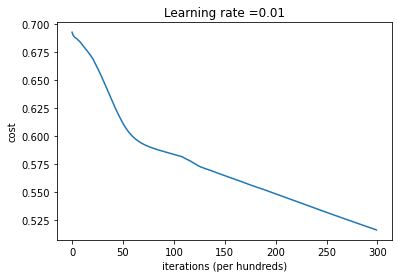

Cost after iteration 29999: 0.48820369055189955


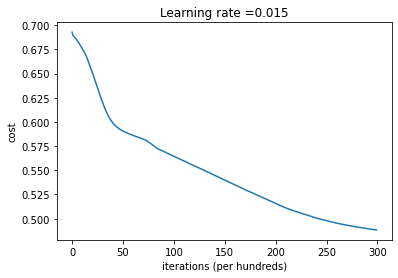

Cost after iteration 29999: 0.46882903333149023


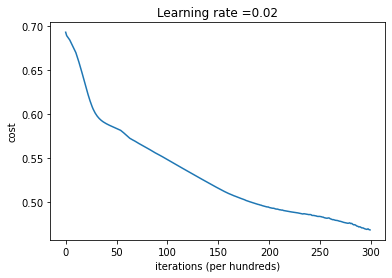

Cost after iteration 29999: 0.45944049025568373


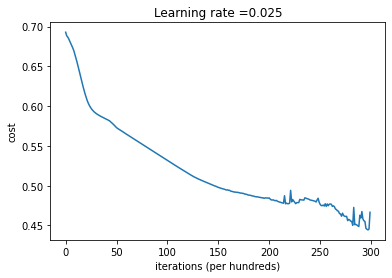

Cost after iteration 29999: 0.4285711883801426


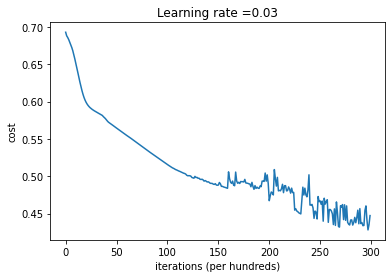

Cost after iteration 29999: 0.4099023539397922


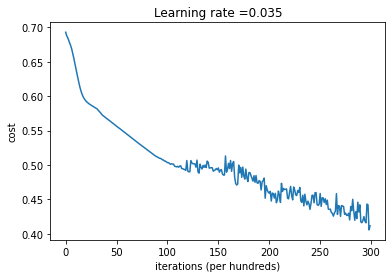

Cost after iteration 29999: 0.4177552117600459


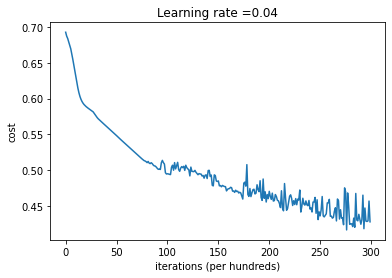

In [47]:
#tuning the learning rate
for l in [0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04]:
    parameters_clsnn, costs_clsnn = L_layer_model(X_train_clsnn.T, np.array(y_train_clsnn), [34, 5, 5, 1], learning_rate = l, num_iterations = 30000, final_activation = 'sigmoid', print_cost = False, lambd = 0)
    plot_costs(costs_clsnn, l)

As learning rate increases, we observe that above graphs loose their smoothness in less number of iterations.

Cost after iteration 9999: 0.51566408325702


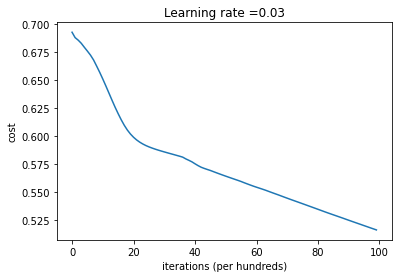

Cost after iteration 14999: 0.4878741270310577


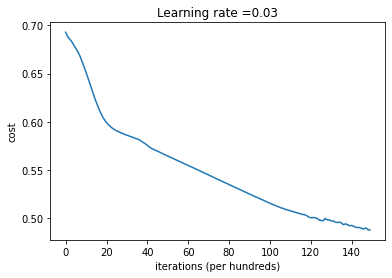

Cost after iteration 19999: 0.4664009031723119


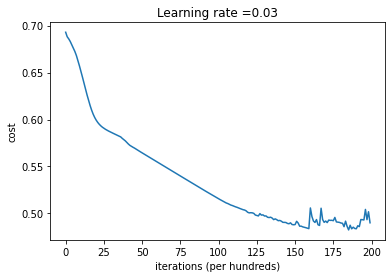

Cost after iteration 24999: 0.4579990886796754


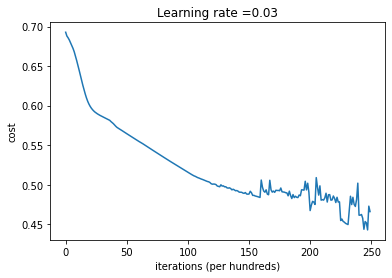

In [48]:
for n in [10000, 15000, 20000, 25000]:
    parameters_clsnn, costs_clsnn = L_layer_model(X_train_clsnn.T, np.array(y_train_clsnn), [34, 5, 5, 1],
                                                  learning_rate = 0.03, num_iterations = n,
                                                  final_activation = 'sigmoid', print_cost = False, lambd = 0)
    plot_costs(costs_clsnn, 0.03)

Summary of above parameter tuning

Based on above graphs, we decide that optimal number of iteration is 150000 with learning rate of 0.06.

Cost after iteration 149999: 0.4211289287182507


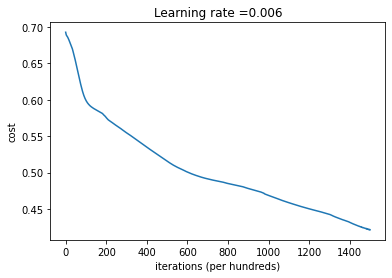

In [49]:
#model 1 with optimal parameters
parameters_clsnn1, costs_clsnn1 = L_layer_model(X_train_clsnn.T, np.array(y_train_clsnn), [34, 5, 5, 1],
                                                learning_rate = 0.006, num_iterations = 150000, final_activation = 'sigmoid',
                                                print_cost = False, lambd = 0)
plot_costs(costs_clsnn1, 0.006)

Cost after iteration 149999: 0.12595700262073875


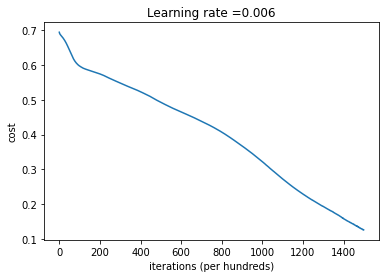

In [50]:
#model-2, attempt to reduce cost and bias by increasing number of hidden layers
parameters_clsnn2, costs_clsnn2 = L_layer_model(X_train_clsnn.T, np.array(y_train_clsnn), [34, 10, 10, 1],
                                                learning_rate = 0.006, num_iterations = 150000, final_activation = 'sigmoid',
                                                print_cost = False, lambd = 0)
plot_costs(costs_clsnn2, 0.006)

Increase of nodes in hidden layer reduces our cost to 0.125 from 0.421.

Cost after iteration 149999: 0.0024910429923266555


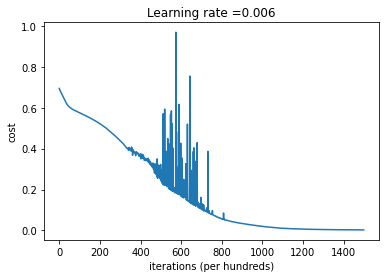

In [51]:
#model-3, model-2 + another hidden layer
parameters_clsnn3, costs_clsnn3 = L_layer_model(X_train_clsnn.T, np.array(y_train_clsnn), [34, 10, 10, 10, 1],
                                                learning_rate = 0.006, num_iterations = 150000, final_activation = 'sigmoid',
                                                print_cost = False, lambd = 0)
plot_costs(costs_clsnn3, 0.006)

This model has an even lower cost than model 2 but at the cost of smooth decline(as seen in above graph).

## Model 2 and 3 training and Validation scores

In [52]:
pred_train_clsnn2 = predict(X_train_clsnn.T, np.array(y_train_clsnn), parameters_clsnn2, final_activation = 'sigmoid')
pred_train_clsnn2

Accuracy: 0.975609756097561
Precision: 1.0
Recall: 0.975


array([[1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
        1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
        1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
        0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
        0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
        0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
        1., 0., 0., 0., 1., 0., 1., 0.]])

In [53]:
pred_cv_clsnn2 = predict(X_cv_clsnn.T, np.array(y_cv_clsnn), parameters_clsnn2, final_activation = 'sigmoid')
pred_cv_clsnn2

Accuracy: 0.7352941176470589
Precision: 0.8421052631578947
Recall: 0.7272727272727273


array([[1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
        1., 1., 1., 1., 1., 0., 1., 0., 0.]])

In [54]:
pred_train_clsnn3 = predict(X_train_clsnn.T, np.array(y_train_clsnn), parameters_clsnn3, final_activation = 'sigmoid')
pred_train_clsnn3

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


array([[1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
        1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
        1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
        1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
        0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
        0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
        1., 0., 0., 0., 1., 0., 1., 0.]])

In [55]:
pred_cv_clsnn3 = predict(X_cv_clsnn.T, np.array(y_cv_clsnn), parameters_clsnn3, final_activation = 'sigmoid')
pred_cv_clsnn3

Accuracy: 0.7142857142857143
Precision: 0.7894736842105263
Recall: 0.7142857142857143


array([[1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1.]])

## Model 2 and 3 with regularised weight matrix

Cost after iteration 149999: 0.4036556268988294


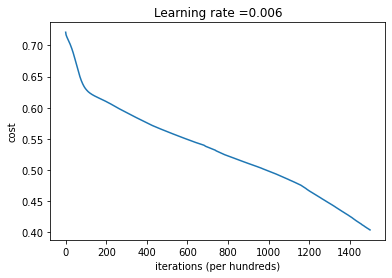

In [56]:
parameters_clsnn2_reg, costs_clsnn2_reg = L_layer_model(X_train_clsnn.T, np.array(y_train_clsnn), [34, 10, 10, 1],
                                                        learning_rate = 0.006, num_iterations = 150000,
                                                        final_activation = 'sigmoid', print_cost = False, lambd = 0.25)
plot_costs(costs_clsnn2_reg, 0.006)

In [57]:
pred_train_clsnn2_reg = predict(X_train_clsnn.T, np.array(y_train_clsnn), parameters_clsnn2_reg, final_activation = 'sigmoid')
pred_train_clsnn2_reg

Accuracy: 0.9049773755656109
Precision: 0.9728260869565217
Recall: 0.9179487179487179


array([[1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
        1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
        0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
        1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
        0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
        0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
        1., 0., 0., 1., 1., 0., 1., 0.]])

In [58]:
pred_cv_clsnn2_reg = predict(X_cv_clsnn.T, np.array(y_cv_clsnn), parameters_clsnn2_reg, final_activation = 'sigmoid')
pred_cv_clsnn2_reg

Accuracy: 0.7575757575757576
Precision: 0.8947368421052632
Recall: 0.7391304347826086


array([[1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
        1., 1., 1., 1., 0., 0., 1., 0., 0.]])

Cost after iteration 149999: 0.22197536608968477


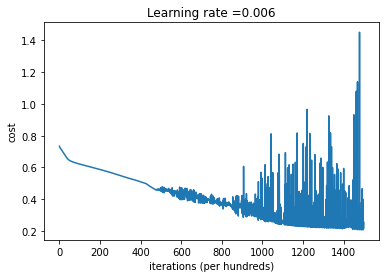

In [59]:
parameters_clsnn3_reg, costs_clsnn3_reg = L_layer_model(X_train_clsnn.T, np.array(y_train_clsnn), [34, 10, 10, 10, 1], learning_rate = 0.006, num_iterations = 150000, final_activation = 'sigmoid', print_cost = False, lambd = 0.25)
plot_costs(costs_clsnn3_reg, 0.006)

In [60]:
pred_train_clsnn3_reg = predict(X_train_clsnn.T, np.array(y_train_clsnn), parameters_clsnn3_reg, final_activation = 'sigmoid')
pred_train_clsnn3_reg

Accuracy: 0.9615384615384616
Precision: 1.0
Recall: 0.96


array([[1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
        1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
        1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
        0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
        0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
        0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
        1., 0., 0., 0., 1., 0., 1., 0.]])

In [61]:
pred_cv_clsnn3_reg = predict(X_cv_clsnn.T, np.array(y_cv_clsnn), parameters_clsnn3_reg, final_activation = 'sigmoid')
pred_cv_clsnn3_reg

Accuracy: 0.6578947368421053
Precision: 0.7058823529411765
Recall: 0.6


array([[1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
        1., 0., 1., 1., 0., 0., 0., 1., 1.]])

## Comparison between regularised and un-regularised approaches on validation sets

### Model 2
- Regularised Accuracy increased by 2%.
- Regularised Precision increased by 5%. 
- Regularised Recall increased by a little less than 2%.  


### Model 3
- All three parameters decreased in case of regularised approach.

So, we prefer model 2 in regularised form and model 3 in normal form

 # model performance assessment

In [62]:
#most preffered model
pred_test_clsnn2_reg = predict(X_test_clsnn.T, np.array(y_test_clsnn), parameters_clsnn2_reg, final_activation = 'sigmoid')
pred_test_clsnn2_reg

Accuracy: 0.6944444444444444
Precision: 0.7777777777777778
Recall: 0.6666666666666666


array([[1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
        0., 0., 0., 1., 1., 1., 0., 0., 1.]])

In [63]:
pred_test_clsnn3 = predict(X_test_clsnn.T, np.array(y_test_clsnn), parameters_clsnn3, final_activation = 'sigmoid')
pred_test_clsnn3

Accuracy: 0.625
Precision: 0.6666666666666666
Recall: 0.5


array([[1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
        0., 0., 1., 0., 1., 1., 1., 0., 0.]])

    In conclusion, regularised model gives us much better results.

# 8.2

In [64]:
data_regnn=return_data.reset_index(drop=True)
data_regnn

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
0,-0.071509,-0.048580,-0.069555,-0.059160,-0.084724,-0.057221,-0.081275,-0.046348,-0.081386,-0.044791,...,-0.069017,-0.074967,-0.041213,-0.046524,-0.062106,-0.068266,-0.067051,-0.063629,-0.053014,-0.060430
1,-0.026471,-0.019174,-0.049493,-0.020068,-0.042187,-0.020433,-0.049758,-0.028433,-0.056562,-0.052214,...,-0.051499,-0.041087,-0.112357,-0.044990,-0.037393,-0.036238,-0.033456,-0.017939,-0.017172,-0.023102
2,-0.002322,0.029078,-0.058760,0.000497,0.024054,0.035039,-0.028155,0.026618,-0.007567,0.036097,...,0.037197,0.035725,0.066744,-0.016701,0.023604,0.019211,0.042495,0.019384,0.016060,0.013724
3,0.035141,0.078971,0.067806,0.019972,0.011901,0.023032,0.090767,0.035864,0.019159,0.021838,...,0.019015,0.106199,0.091144,0.018555,0.068161,0.008568,-0.003501,0.009931,0.031862,0.016405
4,-0.018185,0.006791,0.030761,-0.004614,-0.025998,-0.066181,0.024631,-0.007426,-0.023979,-0.075624,...,0.004352,0.009865,-0.032250,0.002771,-0.002243,-0.034679,-0.016570,-0.041438,-0.038052,-0.032079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,-0.060663,-0.038719,-0.029566,0.021311,-0.053482,-0.057185,-0.064895,-0.005072,-0.037575,-0.005850,...,-0.035754,-0.038059,-0.053961,-0.010630,-0.024578,-0.041188,-0.026886,-0.027232,-0.028324,-0.005252
247,0.049442,0.038383,0.005972,-0.033009,-0.000706,0.021198,-0.041740,0.006509,0.025536,0.024026,...,0.006563,0.008420,-0.020648,0.011964,0.030356,0.019375,0.018148,0.004926,0.010131,0.016352
248,0.037079,0.073776,-0.022677,0.052142,0.060313,0.050758,0.060642,0.022035,0.039510,0.034281,...,0.018467,0.034006,0.018855,0.011116,0.011926,0.030887,0.017269,0.005202,0.017743,0.039061
249,-0.007048,0.006597,-0.008892,0.011522,-0.014998,-0.035328,-0.012246,-0.008635,0.020786,0.006167,...,-0.004820,-0.033217,-0.028989,0.005622,-0.000604,-0.013707,-0.003026,-0.011244,-0.018731,0.002578


We will use the predefined helper functions to deal with the regression modelling

In [65]:
#Split the data
y_test_regnn, X_test_regnn, y_train_regnn, X_train_regnn, y_cv_regnn, X_cv_regnn = data_split(data_regnn, 'LUXXX')

## Regression NN Training and Hyperparameter tuning

Cost after iteration 29999: 0.000352742998202384


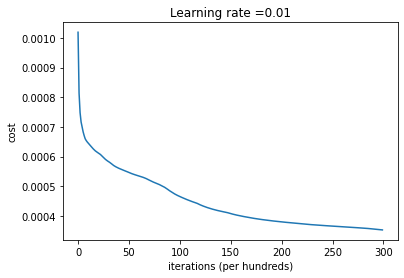

Cost after iteration 29999: 0.00031797604274022665


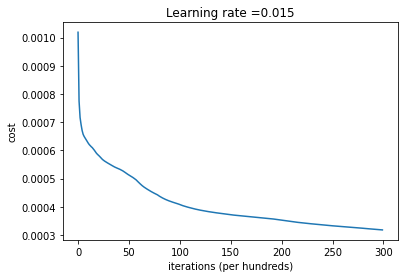

Cost after iteration 29999: 0.00028048308758540626


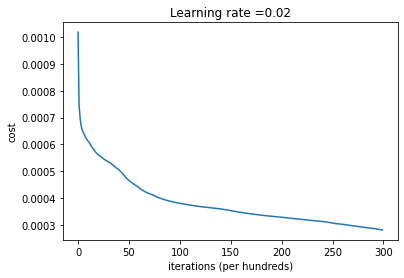

Cost after iteration 29999: 0.0002571827800799681


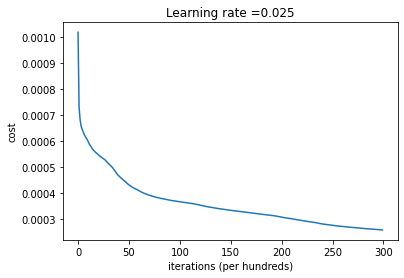

Cost after iteration 29999: 0.0002434035779995923


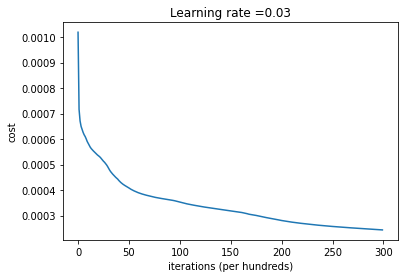

Cost after iteration 29999: 0.00023399070473575077


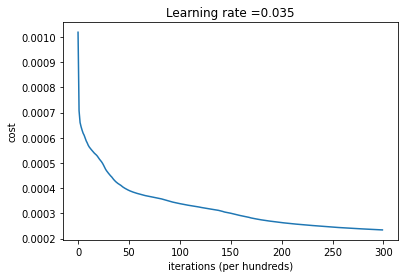

Cost after iteration 29999: 0.00022738054138923163


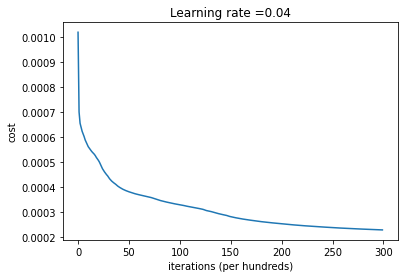

In [66]:
for l in [0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04]:
    parameters_regnn, costs_regnn = L_layer_model(X_train_regnn.T, np.array(y_train_regnn),
                                                  [34, 5, 5, 1], learning_rate = l, num_iterations = 30000,
                                                  final_activation = 'linear', print_cost = False, lambd = 0)
    plot_costs(costs_regnn, l)

We see that n case of regression we are able to reach the cost close to zero much sooner in a much smoother manner than the case of classification. We start the initial model training with learning rate of 0.04 and number of iterations equal to 30000.

Cost after iteration 29999: 0.00022738054138923163


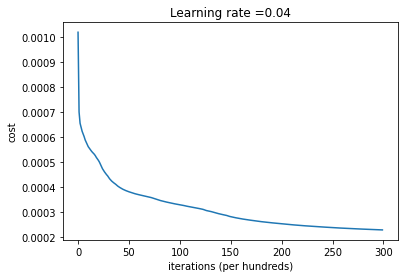

In [67]:
parameters_regnn1, costs_regnn1 = L_layer_model(X_train_regnn.T, np.array(y_train_regnn), [34, 5, 5, 1], 
                                                learning_rate = 0.04, num_iterations = 30000, 
                                                final_activation = 'linear', print_cost = False, lambd = 0)
plot_costs(costs_regnn1, 0.04)

In [68]:
pred_train_regnn1 = predict(X_train_regnn.T, np.array(y_train_regnn), parameters_regnn1, final_activation = 'linear')
pred_train_regnn1

RMSE:0.02132505606532951


array([[ 2.33554219e-03, -7.66540692e-03,  1.90996291e-02,
        -2.72444220e-03,  3.19595428e-02,  2.46134540e-02,
        -6.46946811e-02, -1.32695779e-02,  8.17879093e-03,
         4.69404275e-03,  7.60386167e-03, -3.25515377e-03,
        -7.42802573e-03, -3.35599472e-02,  2.30740652e-02,
         1.16570168e-02,  1.78793012e-02, -5.98207245e-03,
        -1.14028080e-02,  1.48759863e-02, -2.11661329e-02,
         1.67076610e-02,  1.59818150e-02, -2.79608914e-02,
         2.41151753e-02,  4.21502465e-02, -9.66708256e-03,
         2.65430077e-02, -5.77234870e-02,  1.44130963e-03,
         7.66033003e-03,  1.08520166e-02,  1.10518792e-02,
        -1.35903997e-02,  2.61659266e-02, -1.95550062e-02,
         3.07141579e-02, -4.68546464e-03,  4.05652174e-02,
         2.47862664e-03,  5.65389815e-03,  5.92242158e-03,
        -1.21666755e-02,  8.27314438e-02, -9.39656435e-03,
         3.81276488e-03, -1.27093979e-02,  3.18685797e-03,
         8.10686229e-03,  4.87601281e-03, -2.84117671e-0

Text(0.5, 1.0, 'Predicted and Ground Truth Returns - Training Set')

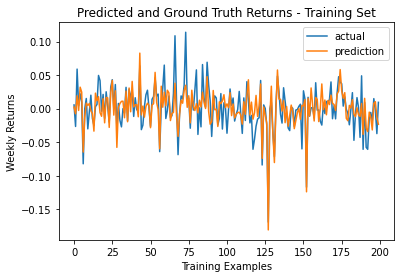

In [69]:
plt.plot(np.array(y_train_regnn).reshape(200,1),label='actual')
plt.plot(pred_train_regnn1.reshape(200,1),label='prediction')
plt.xlabel("Training Examples")
plt.ylabel("Weekly Returns")
plt.legend()
plt.title("Predicted and Ground Truth Returns - Training Set")

In [70]:
pred_cv_regnn1 = predict(X_cv_regnn.T, np.array(y_cv_regnn), parameters_regnn1, final_activation = 'linear')
pred_cv_regnn1

RMSE:0.026781007201653637


array([[ 0.01706385, -0.00801545, -0.01207836, -0.00075984, -0.01004224,
         0.0113894 , -0.00946339,  0.0116997 ,  0.01943855, -0.01489169,
        -0.01192636, -0.00799535,  0.00106499,  0.00987945, -0.05091381,
        -0.02522689,  0.01314332,  0.02483338,  0.0248445 , -0.00542315,
        -0.01196324, -0.00502048, -0.04569327, -0.02602033,  0.00219571]])

Text(0.5, 1.0, 'Predicted and Ground Truth Returns - CV Set')

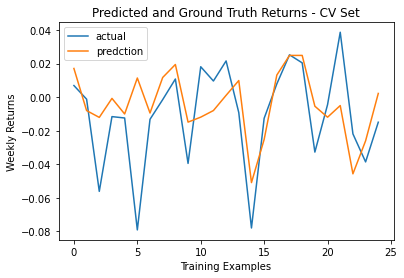

In [71]:
plt.plot(np.array(y_cv_regnn).reshape(25,1),label='actual')
plt.plot(pred_cv_regnn1.reshape(25,1),label='predction')
plt.xlabel("Training Examples")
plt.ylabel("Weekly Returns")
plt.legend()
plt.title("Predicted and Ground Truth Returns - CV Set")

Cost after iteration 29999: 0.00025837080266531053


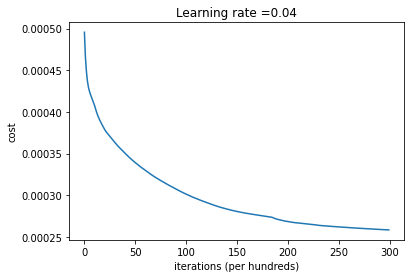

In [72]:
parameters_regnn2, costs_regnn2 = L_layer_model(X_train_regnn.T, np.array(y_train_regnn), [34, 5, 5, 5, 1], learning_rate = 0.04, num_iterations = 30000, final_activation = 'linear', print_cost = False, lambd = 0)
plot_costs(costs_regnn2, 0.04)

In [73]:
pred_train_regnn2 = predict(X_train_regnn.T, np.array(y_train_regnn), parameters_regnn2, final_activation = 'linear')
pred_train_regnn2

RMSE:0.022732012447513515


array([[ 5.69067942e-03, -8.15206962e-03,  2.89444094e-02,
        -1.57729586e-02,  2.50006727e-02,  2.21826295e-02,
        -1.15452197e-01, -1.66754219e-02,  2.32068604e-02,
        -1.28346226e-02,  5.76848270e-03, -9.59967758e-03,
        -5.18315561e-03, -2.61093194e-02,  2.21826295e-02,
         6.20768983e-03,  1.56890736e-02,  4.92027397e-03,
        -1.53515950e-02,  6.30776307e-03, -4.67562071e-02,
         1.93757742e-02,  5.52465959e-03, -2.35185215e-02,
         2.21826295e-02,  2.41216621e-02, -3.64066517e-03,
         2.21826295e-02, -2.10282158e-02, -6.16416187e-03,
        -1.70144006e-02, -2.00743114e-03,  8.62585819e-03,
         1.25213184e-03,  2.21826295e-02, -3.53068911e-02,
         2.21826295e-02,  2.05144717e-04,  2.54577352e-02,
        -1.46971482e-02,  1.39224479e-03,  8.39305547e-03,
         1.84676827e-03,  5.07114664e-02, -1.87402051e-02,
         5.58353865e-03, -1.47398575e-02,  9.62024343e-03,
         2.21826295e-02,  6.78206373e-03, -1.80943341e-0

Text(0.5, 1.0, 'Predicted and Ground Truth Returns - Training Set')

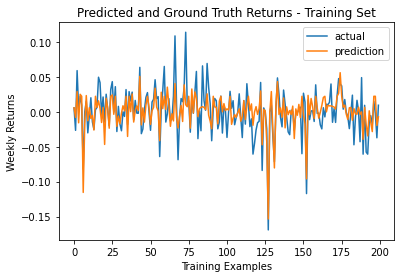

In [74]:
plt.plot(np.array(y_train_regnn).reshape(200,1),label='actual')
plt.plot(pred_train_regnn2.reshape(200,1),label='prediction')
plt.xlabel("Training Examples")
plt.ylabel("Weekly Returns")
plt.legend()
plt.title("Predicted and Ground Truth Returns - Training Set")

In [75]:
pred_cv_regnn2 = predict(X_cv_regnn.T, np.array(y_cv_regnn), parameters_regnn2, final_activation = 'linear')
pred_cv_regnn2

RMSE:0.026192974486295647


array([[ 0.00924406,  0.00216476, -0.02240101, -0.00105646,  0.00099512,
        -0.0052033 , -0.00129907, -0.00192325,  0.02218263, -0.01723473,
        -0.0091752 , -0.00914003, -0.00657367,  0.00646539, -0.03219323,
        -0.01382701,  0.02218263,  0.02218263,  0.0096196 ,  0.00249017,
        -0.00595496,  0.00630427, -0.05009478, -0.00155166,  0.00658503]])

Text(0.5, 1.0, 'Predicted and Ground Truth Returns - CV Set')

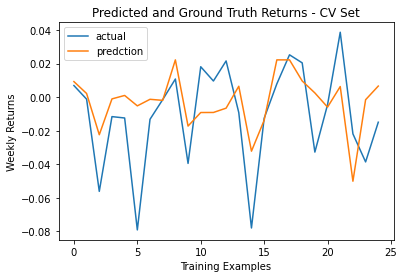

In [76]:
plt.plot(np.array(y_cv_regnn).reshape(25,1),label='actual')
plt.plot(pred_cv_regnn2.reshape(25,1),label='predction')
plt.xlabel("Training Examples")
plt.ylabel("Weekly Returns")
plt.legend()
plt.title("Predicted and Ground Truth Returns - CV Set")

# model performance assessment

In [77]:
pred_test_regnn1 = predict(X_test_regnn.T, np.array(y_test_regnn), parameters_regnn1, final_activation = 'linear')
pred_test_regnn1

RMSE:0.024937372696291305


array([[-8.82879336e-05, -7.33993727e-04,  5.99364008e-02,
        -3.13906746e-03,  1.79150206e-02, -2.23024510e-02,
         2.22232977e-02,  1.20242780e-02,  4.45910246e-03,
         5.74172338e-03, -1.89489551e-02, -3.70368510e-02,
         1.22614323e-02,  9.09562801e-03,  7.99936365e-03,
         2.78343595e-03,  1.04685098e-02,  4.53699382e-03,
         4.75277831e-02,  1.48464844e-03,  4.02771763e-02,
         3.18420259e-02,  1.52024654e-02, -3.14989044e-02,
         1.20135957e-02,  2.21355413e-02]])

Text(0.5, 1.0, 'Predicted and Ground Truth Returns - Test Set')

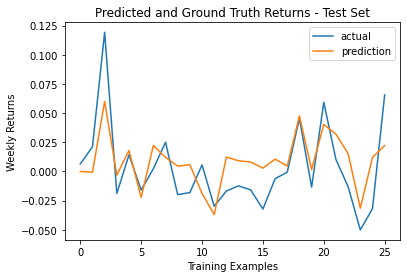

In [78]:
plt.plot(np.array(y_test_regnn).reshape(26,1),label='actual')
plt.plot(pred_test_regnn1.reshape(26,1),label='prediction')
plt.xlabel("Training Examples")
plt.ylabel("Weekly Returns")
plt.legend()
plt.title("Predicted and Ground Truth Returns - Test Set")

In [79]:
pred_test_regnn2 = predict(X_test_regnn.T, np.array(y_test_regnn), parameters_regnn2, final_activation = 'linear')
pred_test_regnn2

RMSE:0.03003137416924314


array([[-0.00406621,  0.01560884,  0.02218263, -0.01048524,  0.03626498,
        -0.01118059,  0.01707654,  0.0199626 ,  0.02218263,  0.00310954,
        -0.01556672, -0.01279292,  0.00562414,  0.02115777,  0.00388305,
         0.00473301,  0.01023819,  0.01352617,  0.02897399, -0.00721188,
         0.03284754,  0.0076804 ,  0.00492169, -0.03613219,  0.00407236,
         0.00731564]])

Text(0.5, 1.0, 'Predicted and Ground Truth Returns - Test Set')

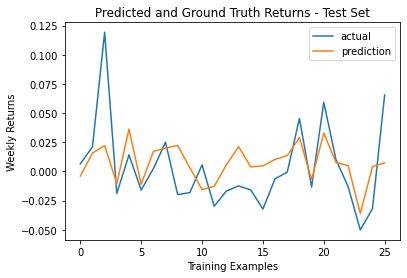

In [80]:
plt.plot(np.array(y_test_regnn).reshape(26,1),label='actual')
plt.plot(pred_test_regnn2.reshape(26,1),label='prediction')
plt.xlabel("Training Examples")
plt.ylabel("Weekly Returns")
plt.legend()
plt.title("Predicted and Ground Truth Returns - Test Set")

# 8.3. Which performed better, the classification or the regression network?


Accuracy Score : 0.56
Precision Score : 0.6666666666666666
Recall Score : 0.5333333333333333
F1 Score : 0.5925925925925926


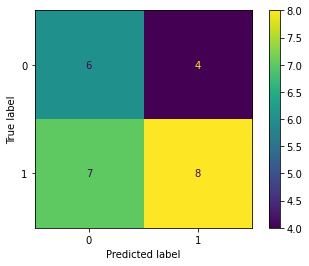

In [81]:
#For classification
y_pred=[1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
        0., 0., 0., 1., 1., 1., 0., 0., 1.]
y_actual=y_test_clsnn.to_list()
ConfusionMatrixDisplay.from_predictions(y_actual,y_pred)
print('Accuracy Score : {}'.format(accuracy_score(y_actual,y_pred)))
print('Precision Score : {}'.format(precision_score(y_actual,y_pred)))
print('Recall Score : {}'.format(recall_score(y_actual,y_pred)))
print('F1 Score : {}'.format(f1_score(y_actual,y_pred)))

Accuracy Score : 0.4
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0


c:\users\harshil sumra\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


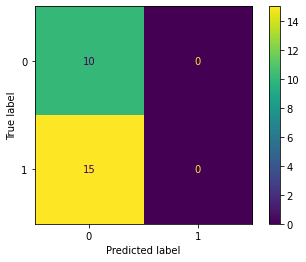

In [82]:
#Naive accuracy- accuracy when predict that all values are 1.
naive_pred=int(np.mean(y_train_clsnn))
naive_pred
y_pred=[naive_pred]*len(y_actual)
y_actual=y_test_clsnn.to_list()
ConfusionMatrixDisplay.from_predictions(y_actual,y_pred)
print('Accuracy Score : {}'.format(accuracy_score(y_actual,y_pred)))
print('Precision Score : {}'.format(precision_score(y_actual,y_pred)))
print('Recall Score : {}'.format(recall_score(y_actual,y_pred)))
print('F1 Score : {}'.format(f1_score(y_actual,y_pred)))

In case of classification model, the resulting neural network is ok but not that promising as the model accuracy with   test data is not much greater than naive accuracy naive accuracy.

In [83]:
#For regression
test_rmse=0.024937372696291305

In [84]:
#Naive approach
naive_pred=y_train_regnn.mean()

In [85]:
y_pred=[naive_pred]*len(y_test_regnn)
y_actual=y_test_regnn
print('Naive RMSE : {}'.format(np.sqrt(mean_squared_error(y_actual,y_pred))))

Naive RMSE : 0.03582877319742751


    Our model RMSE is roughly 1% magnitude less than Naive RMSE.
        The model itself works well in presence of small fluctuations but fails to fully capture huge swings as shown in the above graph.

        `Otherwise comparison of classification and regression equation very hard to do in this case as we have different dependent variables and there is no clear way to derive classification related data from regression output as we have done random sampling. Also they have different performance measures.

In order to try to make comparisons, we transform the regression output to classification output as below.

In [86]:
reg_cls=y_test_regnn.to_frame()
reg_cls.index

Int64Index([ 67, 250, 230, 161,  91, 224,  58, 234, 180,   4, 243, 188, 116,
            182, 127,  78, 184,  51,  27,  73, 225,  34,  95, 186, 120, 119],
           dtype='int64')

Accuracy Score : 0.8461538461538461
Precision Score : 0.7692307692307693
Recall Score : 0.9090909090909091
F1 Score : 0.8333333333333333


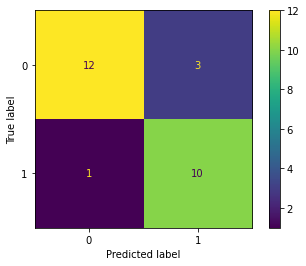

In [87]:
reg_cls['lag1']=[-0.018531906556807032, -0.0070477005029424555, 0.04847401601085344, 0.00578989280930875, 0.014467152343498269,
 -0.001284402299549403, 0.05772198901400194, -0.020077393417211598, 0.022623194426690585, 0.03514125311860394, 0.035904396219846424,
 -0.028270397948679027, -0.04147384959172751, 0.03864426613439376, 0.001056977405978765, 0.006002803894886277, -0.005648233489330523,
 -0.00801118049092231, -0.015664738970292413, 0.023434718702304735, -0.01604897259871585, 0.004063449790093321,-0.026234148383806,
 0.048897484458762186, 0.06552911522411442, 0.03856334000873929]
reg_cls['LUXXX_pred']=[-8.82879336e-05, -7.33993727e-04,  5.99364008e-02,
        -3.13906746e-03,  1.79150206e-02, -2.23024510e-02,
         2.22232977e-02,  1.20242780e-02,  4.45910246e-03,
         5.74172338e-03, -1.89489551e-02, -3.70368510e-02,
         1.22614323e-02,  9.09562801e-03,  7.99936365e-03,
         2.78343595e-03,  1.04685098e-02,  4.53699382e-03,
         4.75277831e-02,  1.48464844e-03,  4.02771763e-02,
         3.18420259e-02,  1.52024654e-02, -3.14989044e-02,
         1.20135957e-02,  2.21355413e-02]
reg_cls['y_actual']=np.where(reg_cls['LUXXX']>reg_cls['lag1'],1,0)
reg_cls['y_pred']=np.where(reg_cls['LUXXX_pred']>reg_cls['lag1'],1,0)
ConfusionMatrixDisplay.from_predictions(reg_cls['y_actual'],reg_cls['y_pred'])
print('Accuracy Score : {}'.format(accuracy_score(reg_cls['y_actual'],reg_cls['y_pred'])))
print('Precision Score : {}'.format(precision_score(reg_cls['y_actual'],reg_cls['y_pred'])))
print('Recall Score : {}'.format(recall_score(reg_cls['y_actual'],reg_cls['y_pred'])))
print('F1 Score : {}'.format(f1_score(reg_cls['y_actual'],reg_cls['y_pred'])))

### In conclusion, we find that regression neural network are much better on all perfomance parameters as compared to classification neural network. 